----
# Introduction to Data Science and Systems 2020-2021

## Lab: Introduction to Jupyter, Python and Numpy [unassessed]
University of Glasgow

v20202021a



----

## Purpose of this lab

This lab is intended to introduce you to the basic use of the Juypter+Python+Numpy environment, and show how the autograding in exercises works.

If/when you complete this exercise, you will submit it on Moodle along with a pdf (see instructions at the bottom of the notebook). You will get a mark, but this **will not count towards your final grade**. 

It is strongly recommended that you complete this exercise fully. This will take around two hours if you already know some NumPy.


## Guide

#### Outline

* Using Jupyter
* A quick NumPy tutorial
* NumPy questions

#### Jupyter
If you have not used Jupyter before [jump to the Jupyter Quickstart](guides/JupyterGuide.ipynb) before continuing. 

#### Material and resources 
- It is recommended to keep the relevant material while doing this lab exercise. 
- If you are stuck, the following resources are very helpful:
 * [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
 * [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
 * [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

#### Marking and Feedback
This is a test exercise, but the assessed labs are marked using three different techniques;

- Autograded with feedback; you'll get immediate feedback.
- Autograded without (immediate) feedback (there will always be a small demo/test so you can be confident that the format of your answer is correct).
- Manually graded (by an actual human). This type of question generates a pdf file that must be uploaded to Moodle alongside the notebook. 

This test exercise only contains "Autograded with feedback" type questions and a trivial manual question (your name) printed to a pdf.

*Note*: auto-graded results are always provisional and subject to change in case there are significant issues (this will usually be in favour of the student).

#### Help \& Assistance
- This lab is graded and the lab assistants/lecturer can provide guidance, but we can (and will) not give you the final answer or confirm your result.

#### Plagiarism
- All submissions (including the code) will be automatically compared against each other to make sure your submission represents an independent piece of work!                            

## Before you start

Let's import the basics... 

In [2]:
# Make sure you run this cell!

from utils.tick import reset_marks, summarise_marks, marks
from utils.checkarr import array_hash, check_hash # tools we use for checing your answer
import numpy as np  # NumPy
from utils.matrices import print_matrix, show_boxed_tensor_latex
from uuid import getnode as get_mac
import os
import sys
import binascii # you can ignore this

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline

import utils.image_audio as ia

reset_marks()

# The follwing command generaties a unique key for your system/computer/account
# special hash funciton
def case_crc(s, verbose=True):
    h_crc = binascii.crc32(bytes(s.lower(), 'ascii'))
    if verbose:
        print(h_crc)
    return h_crc
uuid_simple = (("%s") % get_mac())
uuid_str = ("%s\n%s\n%s\n%s\n%s\n") % (os.path,sys.path,sys.version,sys.version_info,get_mac())
uuid_system = case_crc(uuid_str,verbose=False) 

print("Everything imported OK (it is ok to get a warning)")

Everything imported OK (it is ok to get a warning)


## 1: Autograder tests

Lab exercises will (mainly) be autograded via automatic tests.

The following parts have some questions to answer, and some tests (which you cannot alter) which will be run against the code you have written. If the tests pass, you will see how many marks you got with a green tick. If they do not pass, you will see a red cross. Remember, this exercise doesn't count for anything, but do try to complete the exercises.

Here's a free 5 marks:

In [4]:
with marks(5):
    print("Hello world")

Hello world


And here's what happens when you have an error. Try setting `a` to 1, remove the `raise NotImplementedError()` line, and making sure you can get this to pass. 

In [5]:
a = 2
# YOUR CODE HERE
a = 1

In [6]:
with marks(5):
    assert(a==1)

----------------

----------------

# 2. Introduction to NumPy

We will be using [numpy](numpy.org) as the basis for our numerical operations. This provides a datatype called `ndarray`, that can be used to store and manipulate arrays of numbers.

## NumPy worked example
If you have not used NumPy before or if you are rusty [then work through the example before starting](guides/numpy_example.ipynb)

---

## References and cheat sheets

If you are stuck, the following resources are very helpful:

### Cheatsheets
* [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
* [Python for Data Science cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)
* [Another NumPy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

### API reference and user guide
* [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
* [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

### Tutorials
You don't need to read these, but if you get stuck or want to go further in depth, the following online resources are helpful for getting familiar with scientific processing in Python:
* JR Johansson's scientific python notes: [JRJohansson](https://github.com/jrjohansson/scientific-python-lectures)
* Scientific packages are well covered in this article: [SciPy lectures](https://scipy-lectures.github.io/)
* A useful [Stanford course](http://web.stanford.edu/~arbenson/cme193.html) on scientific python

---




## Purpose of this lab
This lab should help you:
* create simple arrays
* index and slice arrays
* stack arrays together
* compute simple statistics of arrays
* understand array arithmetic and broadcasting rules
* apply conditions to arrays and use Boolean indexing

-----
# NumPy

The foundation package for numerical operations is **NumPy** which provides an array type and accelerated operations on it. 

A very important part of using numerical libraries like numpy is **vectorising operations**: avoiding explicit loops over values in the arrays and instead using library functions to do manipulations. It is *massively* faster to have numpy add to arrays together than to iterate over the elements adding them together in Python.

In [7]:
a = np.zeros((5,5))
b = np.ones((5,5))
y = np.zeros((5,5))

# YES: do things like this
# a and b are NumPy arrays
x = a + b

# NO: don't do this
# this is very inefficient
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        y[i,j] = a[i,j] + b[i,j]

## No for loops (unless specified)
In this lab **do not** use explicit loops, like `while` or `for`, unless the question explicitly asks you to. In future labs you may need to use the occasional `for` loop, but try and avoid them where possible.

NumPy provides the **np.array** class which is a n-dimensional array of numbers **of the same type**. Arrays can be created in several ways: from a Python list (and nD arrays from nested lists), as a "blank" matrix of zeros or ones or random data, by copying existing arrays, loaded from disk or from certain special functions.

**You can always make a copy of an array using np.array() on an existing array** (e.g. `x = np.array(y)` makes a new **copy** of y). `np.array()` will also convert any iterable object (lists, tuples) into an array if it can. Note that a few operations will *change arrays in place*, and most will *return new copies*.

In [8]:
x = np.array([1.0,2.0,3.0,4.0]) # create an array from a list
print(x) # print the array

# print the matrix, but nicer (note: the first string is a LaTeX expression)
print_matrix("x", x) 

print(x.dtype)  # datatype
print(x.shape)  # shape of array

[1. 2. 3. 4.]


<IPython.core.display.Latex object>

float64
(4,)


# 3: Create some arrays
Create the following arrays, with the following specifications:
(**don't** use `np.array` to do this). If you don't know how to do this,
look at the worked example, or look at the cheatsheet or API reference.

Use `np.zeros`, `np.ones`, `np.full`, `np.arange` and `np.random.normal` to solve these questions.

* `x`: a 8 x 8 matrix of all ones
* `y`: a 2 element vector, with all elements equal to np.pi
* `z`: a 1 x 2 x 5 element array of all ones.
* `q`: an 1D array with 10 elements, from 0-18 (inclusive), stepping by 2. 
* `r`: an 400 element array, random numbers normally distributed with mean 0, std. dev. 1.0 **(don't print this one out)**

Print out your arrays using `print_matrix` (for 1D and 2D matrices) or np.shape to see if they look right.

Check that the tests pass. 

In [9]:
# YOUR CODE HERE
x = np.zeros((8,8))
y = np.array([np.pi, np.pi])
z = np.ones((1,2,5))
q = np.arange(0,19,2)
r = np.random.normal(0,1,400)

In [10]:
with marks(2):
    assert(check_hash(x,((8, 8), 0.0)))

In [11]:
with marks(1):
    assert(check_hash(y, ((2,),  21.991148575128552)))

In [12]:
with marks(1):
    assert(check_hash(z, ((1, 2, 5), 59.0)))

In [13]:
with marks(1):
    assert(check_hash(q,((10,), 701.744562646538)))

In [14]:
with marks(1):
    assert(r.shape==(400,)  and np.std(r)>0.75 and np.std(r)<1.5 and np.all(np.diff(r.ravel())!=0.0))

## 4: How to keep snails alive

<img src="imgs/snails.jpg">*[[Image](https://flickr.com/photos/chodhound/6083328289 "Snail") by [ChodHound](https://flickr.com/people/chodhound) license [CC BY-SA](https://creativecommons.org/licenses/by-sa/2.0/)]*

Scientists at the Zoology Department, The University of Adelaide have studied the best conditions to keep snails alive. They have recorded a dataset of observations of snail mortality under controlled conditions. This data set is in the file `data/snails.txt`.

#### An excerpt from the data set description
>Groups of 20 snails were held for periods of 1, 2, 3 or 4 weeks in carefully
controlled conditions of temperature and relative humidity. There were two
species of snail, 0 and 1. At the end of the exposure time the snails
were tested to see if they had survived. 

>The data are unusual in that in most cases fatalities during the experiment
were fairly small. [lucky snails!]

### The task
The data is a 2D array, and has six columns, with these definitions:

     species(binary) exposure(weeks) humidity(%) temperature(deg. C) n_deaths n_snails
    
Each row represents one set of observations (i.e. one group of snails). You are to compute some basic properties of this data. Use NumPy operations to do the computations.

A. **Loading arrays** 
* Load this data as a NumPy array called `snails`. Note: use NumPy functions to do this! **Do not parse the file yourself** The file is space delimited.
* Print it out. Use this format to print out the results:
    
      print("snails\n", snails)

In [3]:
# YOUR CODE HERE
snails = np.loadtxt('./data/snails.txt')
print("snails\n", snails)

snails
 [[ 0.   1.  60.  10.   0.  20. ]
 [ 0.   1.  60.  15.   0.  20. ]
 [ 0.   1.  60.  20.   0.  20. ]
 [ 0.   1.  65.8 10.   0.  20. ]
 [ 0.   1.  65.8 15.   0.  20. ]
 [ 0.   1.  65.8 20.   0.  20. ]
 [ 0.   1.  70.5 10.   0.  20. ]
 [ 0.   1.  70.5 15.   0.  20. ]
 [ 0.   1.  70.5 20.   0.  20. ]
 [ 0.   1.  75.8 10.   0.  20. ]
 [ 0.   1.  75.8 15.   0.  20. ]
 [ 0.   1.  75.8 20.   0.  20. ]
 [ 0.   2.  60.  10.   0.  20. ]
 [ 0.   2.  60.  15.   1.  20. ]
 [ 0.   2.  60.  20.   1.  20. ]
 [ 0.   2.  65.8 10.   0.  20. ]
 [ 0.   2.  65.8 15.   1.  20. ]
 [ 0.   2.  65.8 20.   0.  20. ]
 [ 0.   2.  70.5 10.   0.  20. ]
 [ 0.   2.  70.5 15.   0.  20. ]
 [ 0.   2.  70.5 20.   0.  20. ]
 [ 0.   2.  75.8 10.   0.  20. ]
 [ 0.   2.  75.8 15.   0.  20. ]
 [ 0.   2.  75.8 20.   0.  20. ]
 [ 0.   3.  60.  10.   1.  20. ]
 [ 0.   3.  60.  15.   4.  20. ]
 [ 0.   3.  60.  20.   5.  20. ]
 [ 0.   3.  65.8 10.   0.  20. ]
 [ 0.   3.  65.8 15.   2.  20. ]
 [ 0.   3.  65.8 20.   4.  20. ]
 [

In [16]:
with marks(4):
    assert(check_hash(snails, ((96, 6), 3082003.4024073719)))

B. **Basic indexing** 
Compute the following results, storing the results in the variable specified and printing them out. Use the same printing format as A.

* `hum_last` the humidity in the last entry in the table.
* `temp_first` the temperature in the first entry in the table. 
* `weeks` the whole column of "weeks exposure".
* `row_third` the third row of observations. (remember 0 indexing)


In [17]:
# YOUR CODE HERE
hum_last = snails[-1,2]
temp_first = snails[0,3]
weeks = snails[:,1]
row_third = snails[2]

print("hum_last\n", hum_last)
print("temp_first\n", temp_first)
print("weeks\n", weeks)
print("row_third\n", row_third)

hum_last
 75.8
temp_first
 10.0
weeks
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
row_third
 [ 0.  1. 60. 20.  0. 20.]


In [18]:
with marks(2):
    assert(check_hash(hum_last, ((), 379.0)))

In [19]:
with marks(2):
    assert(check_hash(temp_first, ((), 50.0)))

In [20]:
with marks(2):
    assert(check_hash(weeks, ((96,), 13091.118033988751)))
    

In [21]:
with marks(2):
    assert(check_hash(row_third, ((6,), 490.54981015887836)))

C. **Aggregate functions** 
Compute the following results, storing the results in the variable specified and printing them out:

* `total_deaths` total number of snails that died
* `total_still_alive` total number of snails that survived the whole study
* `mean_temp` mean temperature in the whole study
* `max_humidity` highest humidity in the study
* `average_death_rate` mean of the ratio of snail deaths to snails in the study
* `snail_weeks` the total amount of snail effort that went into this study (number of snails times number of weeks)

Each computation should be a single line of code

In [22]:
# YOUR CODE HERE
total_deaths = np.sum(snails[:,4])
total_still_alive = np.sum(snails[:,5]-snails[:,4])
mean_temp = np.mean(snails[:,3])
max_humidity = np.max(snails[:,2])
average_death_rate = np.mean(snails[:,4])/20
snail_weeks = np.sum(snails[:,1]*20)

In [23]:
with marks(2):
    assert(check_hash(total_deaths, ((), 1375.0)))
    

In [24]:
with marks(2):
    assert(check_hash(total_still_alive, ((), 8225.0)))

In [25]:
with marks(2):
    assert(check_hash(mean_temp, ((), 75.0)))

In [26]:

with marks(2):
    assert(check_hash(max_humidity, ((), 379.0)))

In [27]:
with marks(6):
    assert(check_hash(average_death_rate, ((), 0.71614583333333326)))

In [28]:
with marks(6):
    assert(check_hash(snail_weeks, ((), 24000.0)))

D. **Boolean indexing**
Compute the following results, storing the results in the variable specified and printing them out:

* `species_0` and `species_1`: split the dataset into two arrays, one with the entries for species 0 and one with the entries for species 1.

* `weakest_snail` the snail species (0 or 1) that had the highest average death rate

In [29]:
# YOUR CODE HERE
species_0 = np.array(snails[snails[:,0]==0])
species_1 = np.array(snails[snails[:,0]==1])
weakest_snail = np.mean(species_0[:,4]) < np.mean(species_1[:,4])

In [30]:
with marks(8):
    assert(check_hash(species_0, ((48, 6), 762041.58357993606)))
    assert(check_hash(species_1, ((48, 6), 791902.31693958596)))  

In [31]:
with marks(6):
    assert(check_hash(weakest_snail, ((), 5.0)))

E. **Arithmetic and ordering**
Compute the following results, storing the results in the variable specified and printing them out:

* `deg_f` each temperature in the study, but in degrees Fahrenheit. Use the knowledge that `0C = 32F, 100C = 212F`
* `mean_cols` the mean of all the columns, as a 1D vector
* `death_rate` the death rates, in sorted order, smallest first
* `exposure_death_order` the exposure durations (in weeks), but in sorted in the order of death rates, smallest death rate first.

* `best_temp`, `best_hum` the best temperature and humidity to keep a snail for four weeks without it dying. *Look only at the four week exposures, ignoring snails kept for less than this time.* 

In [32]:
# YOUR CODE HERE
deg_f = 9*snails[:,3]/5 + 32
mean_cols = [np.mean(snails[:,0]), np.mean(snails[:,1]), np.mean(snails[:,2]), np.mean(snails[:,3]), np.mean(snails[:,4]), np.mean(snails[:,5])]
death_rate = np.sort(snails[:,4]/20)
exposure_death_order = snails[:,1]
exposure_death_order = exposure_death_order[np.argsort(snails[:,4])]
temp = np.array(snails[snails[:,1]==4])
best_temp = snails[np.argmin(temp[:,4]),3]
best_hum = snails[np.argmin(temp[:,4]),2]

In [33]:
with marks(1):
    assert(check_hash(deg_f, ((96,), 275523.34846922837)))

In [34]:
with marks(1):
    assert(check_hash(mean_cols, ((6,), 522.92336963727359)))

In [35]:
with marks(2):
    assert(check_hash(death_rate, ((96,), 1100.9803982902313)))

In [36]:
with marks(4):
    assert(check_hash(exposure_death_order, ((96,), 13983.118033988751)))

In [37]:
with marks(4):
    assert(check_hash(best_temp, ((), 50.0)))

In [38]:
with marks(4):
    assert(check_hash(best_hum, ((), 379.0)))      

## 5: Image operations
Images can be represented as numerical arrays. We will use images as an example to explore NumPy functionality.

* `img = ia.load_image_colour('filename.png')` will load an image as an array.
* `ia.show_image(img)` will show it in the notebook.
    

A)

We will:
* Load `data/parrots.png` as `img_array` 
* Print out its shape and dtype
* Show the image.

(512, 768, 3) float64


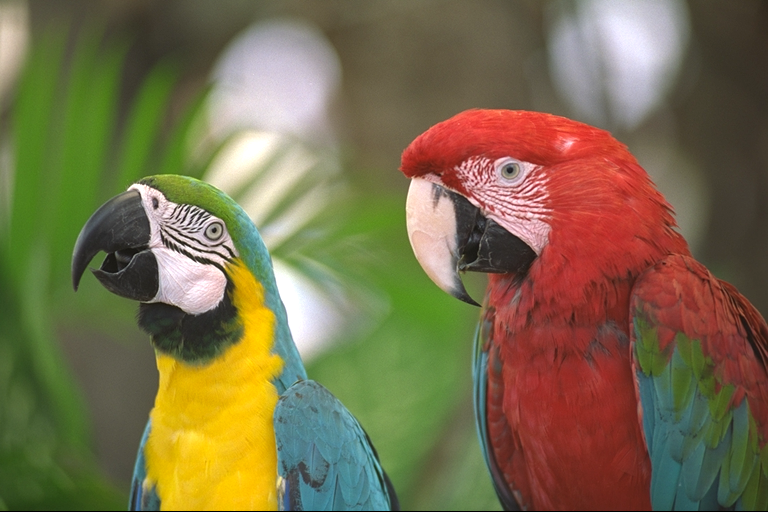

In [39]:
img_array = ia.load_image_colour("data/parrots.png")
print(img_array.shape, img_array.dtype)
ia.show_image(img_array)

B) **Slicing arrays**
* Create an array `cropped` which has the pixels from [150,100] to [350,300]. Note that these positions are in `[row, col]` format, not `[x,y]`.
* Display the cropped array using `show_image()`. 
* Remember: the image is `WxHx3`. Think about how to slice the last dimension.
* Show the cropped image so you can see it.

In [40]:
# YOUR CODE HERE
cropped = img_array[150:350,100:300]

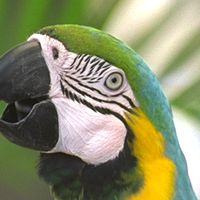

In [41]:
ia.show_image(cropped)
with marks(4):
    assert(check_hash(cropped, ((200, 200, 3), 3409234926.1084023)))

C)  **Modifying arrays**

Create an array "censored" which is the same as `img_array`, but has a black bar across the following regions to protect the parrot's privacy:
    * [200,100] -> [260, 310]
    * [140, 400]-> [200, 650]

Setting array elements to zero will make them black.

**Do not modify the original `img_array`**

In [42]:
# YOUR CODE HERE
censored = np.array(img_array)
censored[200:260,100:310] = 0
censored[140:200,400:650] = 0

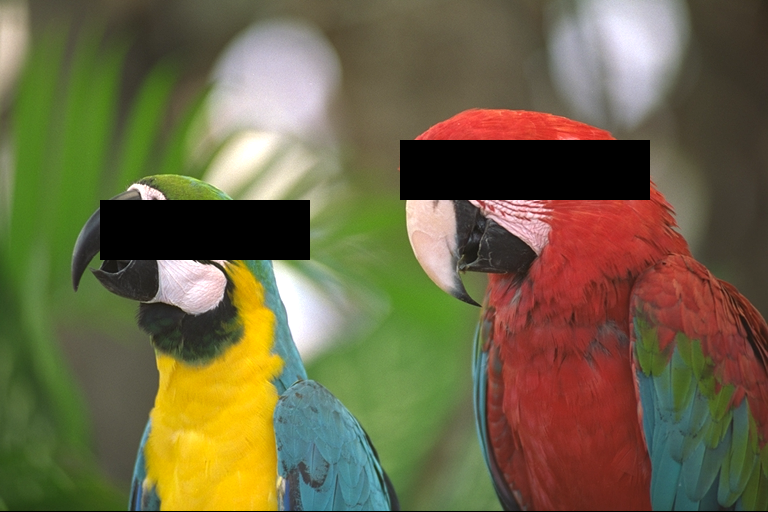

In [43]:
ia.show_image(censored)
with marks(4):
    assert(check_hash(censored, ((512, 768, 3), 250654064351.74332)))
    assert(check_hash(img_array, ((512, 768, 3), 269458072078.68924)))

D) **Elementwise arithmetic** The image is stored as three colour planes, R,G,B. This is the `3` in the last position of the shape of the image (check the `shape` of the array where it is loaded in). The planes are often referred to as "channels". 

* Create an array `channel_diff`, which will be the **absolute** difference of the red channel of `img_array` (channel 0) from the green channel (channel 1), all scaled by a factor of **eight**. Hint: you need to use slicing here.


In [44]:
# YOUR CODE HERE
channel_diff = np.absolute(np.array(img_array[:,:,0])-np.array(img_array[:,:,1]))*8

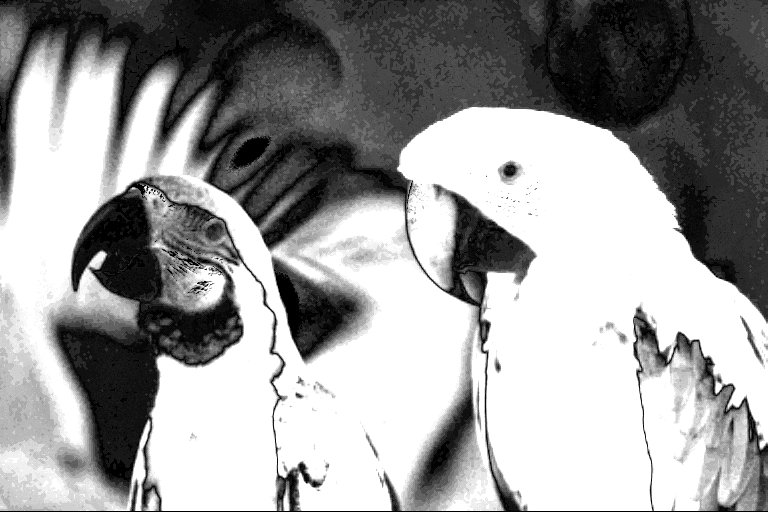

In [45]:
ia.show_image(channel_diff)
with marks(4):
    assert(check_hash(channel_diff, ((512, 768), 95264282406.86458)))

E) **Stacking arrays**

Using *one* `for` loop, create a *list* of arrays which represent a panning animation which is a sequence of cropped versions of `img_array`. 

* The crops should start at [190,30] and be 200 pixels wide and 100 pixels high, and move 12 pixels right and 2 pixels up in each frame (that means the column index increases by 12, and the row index decreases by 2). 
* Create 30 frames. All of them will be the same size.
* Stack the array into a single array called `panning_array`.

Your code should be less than 15 lines (excluding any comments)!

In [46]:
# YOUR CODE HERE
panning_array = []
for i in range(30):
    panning_array.append(np.array(img_array[190-2*i:290-2*i,30+12*i:230+12*i]))

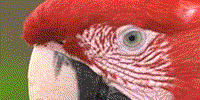

In [47]:
ia.show_gif(panning_array, width="80%")
with marks(10):
    assert(check_hash(panning_array,((30, 100, 200, 3), 834973352307.7242)))